In [ ]:
!pip install tensorflow

In [ ]:
!pip install pandas

In [ ]:
!pip install scikit-learn

In [ ]:
# Step 2: Import libraries
import pandas as pd              # For data handling
import numpy as np               # For numerical operations
import tensorflow as tf          # For building neural network
from sklearn.model_selection import train_test_split  # For splitting data
import matplotlib.pyplot as plt   #for plotting graphs

In [ ]:
# Step 3: Download CSV into Colab directly
csv_url = 'https://gist.githubusercontent.com/nnbphuong/def91b5553736764e8e08f6255390f37/raw/BostonHousing.csv'
df = pd.read_csv(csv_url)

In [ ]:
# Show first few rows so students see structure
print("Dataset preview:")
print(df.head())

Dataset preview:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  CAT. MEDV  
0   4.98  24.0          0  
1   9.14  21.6          0  
2   4.03  34.7          1  
3   2.94  33.4          1  
4   5.33  36.2          1  


In [ ]:
# Optional: rename target for clarity
df = df.rename(columns={'MEDV':'PRICE'})

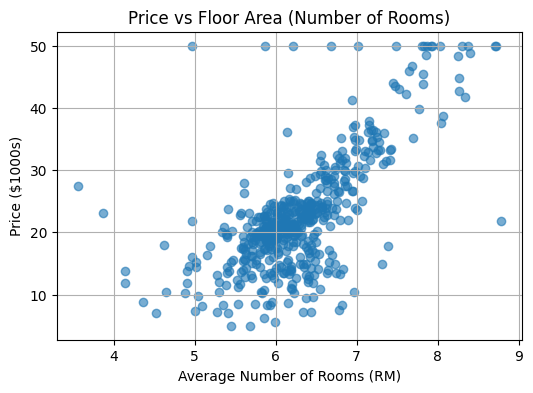

In [ ]:
# 📊 New Plot 1: Show relationship between RM (rooms) and PRICE
plt.figure(figsize=(6,4))
plt.scatter(df['RM'], df['PRICE'], alpha=0.6)
plt.title("Price vs Floor Area (Number of Rooms)")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Price ($1000s)")
plt.grid(True)
plt.show()

In [ ]:
# Step 4: Separate features (X) and label (y)
X = df.drop('PRICE', axis=1).values
y = df['PRICE'].values

In [ ]:
# Step 5: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Training samples: 404, Test samples: 102


In [ ]:
# Step 6: Normalize features for better training
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Step 7: Create a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Single output: house price in $1000s
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 8: Compile the model with optimizer and loss
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

In [ ]:
# Step 9: Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    verbose=1
)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 587.3676 - mean_absolute_error: 22.5102 - val_loss: 527.0258 - val_mean_absolute_error: 21.4511
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 555.9935 - mean_absolute_error: 21.5468 - val_loss: 485.7997 - val_mean_absolute_error: 20.5176
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 513.8353 - mean_absolute_error: 20.7284 - val_loss: 436.7874 - val_mean_absolute_error: 19.3417
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 501.2945 - mean_absolute_error: 20.3761 - val_loss: 374.2548 - val_mean_absolute_error: 17.7097
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 423.6244 - mean_absolute_error: 18.2878 - val_loss: 297.0592 - val_mean_absolute_error: 15.5554
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 264.4440 - mean_absolute_error: 14.1589 - val_loss: 210.1306 - val_mean_absolute_error: 12.9362
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 201.9327 

In [ ]:
# Step 10: Evaluate performance on test data
loss, mae = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest MAE: {mae*1000:.2f} USD")

4/4 - 0s - 10ms/step - loss: 9.0406 - mean_absolute_error: 2.2244

Test MAE: 2224.36 USD


In [ ]:
# Step 11: Make predictions on test set
preds = model.predict(X_test[:20])
print("\nPredictions vs Actual prices (in $1000s):")
for pred, actual in zip(preds.flatten(), y_test[:20]):
    print(f"Predicted: {pred:.2f}, Actual: {actual:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

Predictions vs Actual prices (in $1000s):
Predicted: 26.38, Actual: 23.60
Predicted: 36.68, Actual: 32.40
Predicted: 19.32, Actual: 13.60
Predicted: 27.22, Actual: 22.80
Predicted: 15.36, Actual: 16.10
Predicted: 20.73, Actual: 20.00
Predicted: 17.19, Actual: 17.80
Predicted: 13.59, Actual: 14.00
Predicted: 21.91, Actual: 19.60
Predicted: 16.95, Actual: 16.80
Predicted: 21.19, Actual: 21.50
Predicted: 18.07, Actual: 18.90
Predicted: 6.84, Actual: 7.00
Predicted: 19.75, Actual: 21.20
Predicted: 18.32, Actual: 18.50
Predicted: 22.92, Actual: 29.80
Predicted: 20.07, Actual: 18.80
Predicted: 9.82, Actual: 10.20
Predicted: 41.85, Actual: 50.00
Predicted: 13.58, Actual: 14.10


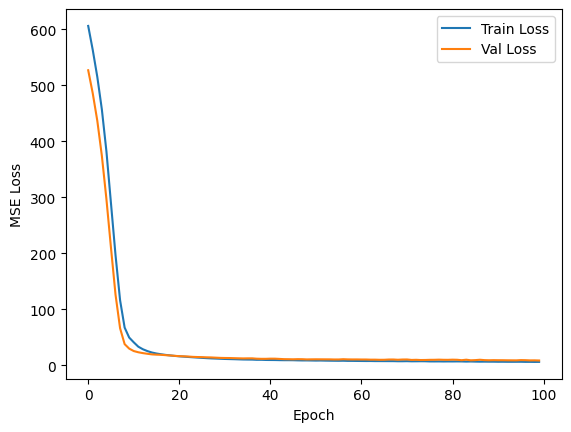

In [ ]:
# Step 12: Plot training history (optional but educational)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

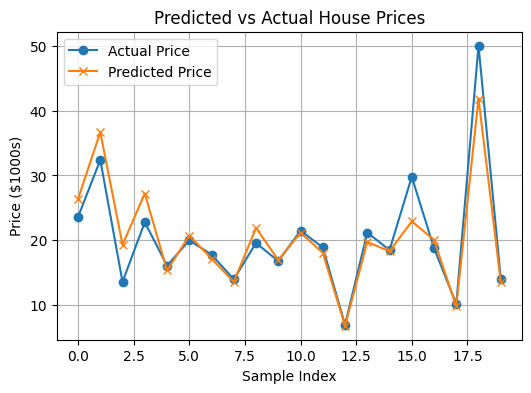

In [ ]:
# 📊 New Plot 2: Compare predicted vs actual prices on test data
plt.figure(figsize=(6,4))
plt.plot(y_test[:20], label='Actual Price', marker='o')
plt.plot(preds[:20], label='Predicted Price', marker='x')
plt.title("Predicted vs Actual House Prices")
plt.xlabel("Sample Index")
plt.ylabel("Price ($1000s)")
plt.legend()
plt.grid(True)
plt.show()